In [1]:
# import libraries
import seaborn as sns
import pandas as pd
import xml.etree.ElementTree as et
import sys

#import data
xtree = et.parse("hw2-patients.xml")
xroot = xtree.getroot()

In [2]:
# organizing dataset into dataframe
col_name = ["name", "age", "gender", "full_age"]
patient_info = []
for node in xroot[2]:
    pname = node.attrib.get("name")
    pfull_age = float(node.attrib.get("age"))
    page = round(pfull_age,1)
    pgender = node.attrib.get("gender")
    patient_info.append({"name":pname, "age": page, "gender":pgender, "full_age":pfull_age})

df = pd.DataFrame(patient_info, columns=col_name)
df.head()

,name,age,gender,full_age
0,Tammy Martin,19.5,female,19.529988
1,Lucy Stribley,1.6,female,1.602197
2,Albert Trevino,19.3,male,19.317023
3,Troy Armour,79.4,male,79.441208
4,Jose Masseria,71.2,male,71.203863


<AxesSubplot:ylabel='Count'>

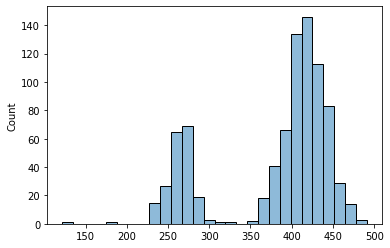

In [3]:
# organize dataset by age
ages = df["age"].value_counts()
age_df = pd.DataFrame(ages)
age_df.reset_index()

# plot histogram of ages
sns.histplot(data=age_df, legend=False)

In [4]:
# find whether any patients share the exact same age
df["unique_exact_age"] = df["full_age"].duplicated(keep=False)
is_same = df[df["unique_exact_age"] == True]
duplicates = is_same['full_age'].count() != 0
print("The statement that any two or more patients share the same exact age is", duplicates)

The statement that any two or more patients share the same exact age is False


In [5]:
# find the distribution of genders
genders = df.groupby("gender")["full_age"].count().reset_index()
genders
print("Provider encoded gender as female, male, and unknown.")

Provider encoded gender as female, male, and unknown.


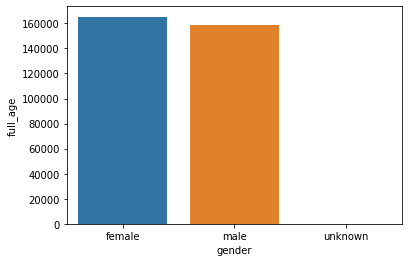

In [6]:
# plot genders
gender_plot = sns.barplot(data=genders, x='gender', y='full_age')

In [7]:
# sort ages
sorted_ages = sorted(df["full_age"])
print("The oldest patient is", sorted_ages[-1], "years old.")

The oldest patient is 84.99855742449432 years old.


In [8]:
# code for finding second oldest person in O(n) time in unsorted list
def find_second_oldest(list):
    oldest = 0
    second_oldest = 0
    for i in list:
       if i > oldest: oldest = i
       elif i > second_oldest: second_oldest = i
    return second_oldest
print("Second oldest is", find_second_oldest(df['full_age']))

Second oldest is 84.9982928781625


In [9]:
# find patient who is 41.5 years old
length = len(df.index)
p = length//2
target = df.iloc[p]['age']
while target != 41.5:
    if target > 41.5: p = p//2
    elif target < 41.5: p = (length - p)//2
    target = df.iloc[p]['age']
matched_age_patient = df.iloc[p]
print(matched_age_patient['name'])

James Robertson


In [10]:
# find number of patients at least 41.5 years old
sorted_rounded_ages = sorted(df['age'])
index_of_age = sorted_rounded_ages.index(41.5)
print("There are", length - index_of_age + 1, "people who are at least 41.5 years old in the dataset")

There are 150677 people who are at least 41.5 years old in the dataset


In [11]:
# generalized function returning number of patients who are
# at least low_age years old but strictly less than high_age years old
# in sorted list lst
def num_patients_in_age_range(lst, low_age, high_age):
    ph = len(lst)//2
    pl = 0
    pl_found = False
    ph_found = False
    carry = 0

    # base cases
    if len(lst) == 0: return 0
    if(lst[-1] < low_age): return 0
    if lst[0] >= low_age:
        pl_found = True
        pl = 0
    if lst[-1] <= high_age:
        ph_found = True
        ph = len(lst) - 1
        while lst[ph-1] == lst[ph]: ph -= 1
        if lst[ph] < high_age: carry = 1
    if(pl_found and ph_found): return ph-pl+carry

    # non-base case
    # find upper limit
    while not ph_found:
        # increment/decrement higher pointer
        if lst[ph] > high_age: ph = ph//2
        elif lst[ph] < high_age:
            # if value does not exist return index of lowest value higher than high_age
            if ph >= len(lst) - 1: ph_found = True
            elif lst[ph+1] > high_age: ph_found = True
            else: ph += (len(lst)-ph)//2

        # if value matched high_age return value
        if lst[ph] == high_age:
            ph_found = True

    # find lower limit
    while not pl_found :
        # increment/decrement lower pointer
        if lst[pl] > low_age:
            # if value does not exist return index of highest value lower than low_age
            if lst[pl-1] < low_age: pl_found = True
            else: pl = pl//2
        elif lst[pl] < low_age: pl += (ph - pl)//2

        # if value matched low_age return value
        if lst[pl] == low_age: pl_found = True

    if pl_found and pl == 0: carry = 1
    return ph-pl+carry

# test function
test_1_lst = [1, 2, 3, 4, 5, 6, 7]
test_2_lst = [0, 0, 0, 1, 3, 5, 7, 8]
test_3_lst = sorted_rounded_ages[1820:1830]
test_4_lst = [0, 1, 3, 5, 7, 8, 8]
test_5_lst = [0, 1]
test_6_lst = [1,2,3]
print("Test 1: testing consecutive numbers \n", num_patients_in_age_range(test_1_lst, 2, 5), "\n Correct number should be 3 \n")
print("Test 2: testing duplicate numbers and high_age > lst[-1] \n", num_patients_in_age_range(test_2_lst, 2, 9), "\n Correct number should be 4 \n")
print("Test 3: testing subset of df \n", num_patients_in_age_range(test_3_lst, 0.3, 0.4), "\n Correct number should be 2 \n")
print("Test 4: testing duplicate high_age \n", num_patients_in_age_range(test_4_lst, 3, 8), "\n Correct number should be 3 \n")
print("Test 5: testing list of two elements \n", num_patients_in_age_range(test_5_lst, 0, 1), "\n Correct number should be 1 \n")
print("Test 6: testing range not in list \n", num_patients_in_age_range(test_6_lst, 8, 10), "\n Correct number should be 0 \n")

Test 1: testing consecutive numbers 
 3 
 Correct number should be 3 

Test 2: testing duplicate numbers and high_age > lst[-1] 
 4 
 Correct number should be 4 

Test 3: testing subset of df 
 2 
 Correct number should be 2 

Test 4: testing duplicate high_age 
 3 
 Correct number should be 3 

Test 5: testing list of two elements 
 1 
 Correct number should be 1 

Test 6: testing range not in list 
 0 
 Correct number should be 0 



In [13]:
# return total number of patients and males in age range
def num_patients_males_in_age_range(dataframe, low_age, high_age):
    sorted_df = dataframe.sort_values(by=['age'])
    lst = sorted_df["age"].reset_index(drop=True)
    ph = len(lst)//2
    pl = 1
    pl_found = False
    ph_found = False
    carry = 0

    # base cases
    if (len(lst) == 0) or (lst[len(lst) - 1] < low_age):
        print("0 patients match description")
        sys.exit("Base case was reached, program terminated")
    if lst[1] >= low_age:
        pl_found = True
        pl = 0
    if lst[len(lst) - 1] <= high_age:
        ph_found = True
        ph = len(lst) - 1
        while lst[ph-1] == lst[ph]: ph -= 1
        if lst[ph] < high_age: carry = 1
    if(pl_found and ph_found): return ph-pl+carry

    # non-base case
    # find upper limit
    while not ph_found:
        # increment/decrement higher pointer
        if lst[ph] > high_age: ph = ph//2
        elif lst[ph] < high_age:
            # if value does not exist return index of lowest value higher than high_age
            if ph >= len(lst) - 1: ph_found = True
            elif lst[ph+1] > high_age: ph_found = True
            else: ph += (len(lst)-ph)//2

        # if value matched high_age return value
        if lst[ph] == high_age:
            ph_found = True

    # find lower limit
    while not pl_found :
        # increment/decrement lower pointer
        if lst[pl] > low_age:
            # if value does not exist return index of highest value lower than low_age
            if lst[pl-1] < low_age: pl_found = True
            else: pl = pl//2
        elif lst[pl] < low_age: pl += (ph - pl)//2

        # if value matched low_age return value
        if lst[pl] == low_age: pl_found = True

    if pl_found and pl == 0: carry = 1
    print("Total number of patients in age range", pl, "to", ph, "is", ph-pl+carry)
    range_df = sorted_df.iloc[pl-1:ph-1]
    males_in_range = range_df[range_df['gender']=='male']
    print("Total number of males in age range is", males_in_range['gender'].count())

# test function
print("Testing using first 10 rows of dataframe df: \n")
print("Dataset 1: \n", df.iloc[0:10].reset_index(drop=True))
num_patients_males_in_age_range(df.iloc[1:11], 0, 10)

print("Testing using last 10 rows of dataframe df: \n")
print("Dataset 2: \n", df.iloc[-11:-1].reset_index(drop=True))
num_patients_males_in_age_range(df.iloc[-11:-1], 30, 50)

print("Testing range not in list: \n")
print("Dataset 3: \n", df.iloc[-11:-1].reset_index(drop=True))
num_patients_males_in_age_range(df.iloc[-11:-1], 80, 90)

Testing using first 10 rows of dataframe df: 

Dataset 1: 
                name   age  gender   full_age  unique_exact_age
0      Tammy Martin  19.5  female  19.529988             False
1     Lucy Stribley   1.6  female   1.602197             False
2    Albert Trevino  19.3    male  19.317023             False
3       Troy Armour  79.4    male  79.441208             False
4     Jose Masseria  71.2    male  71.203863             False
5   Ethel Ferdinand  77.3  female  77.302707             False
6  Elizabeth Heflin   4.2  female   4.246844             False
7    Jesica Gautier  24.3  female  24.334514             False
8       Marta Allen  26.5  female  26.513040             False
9      Thomas Hagan  32.3    male  32.326220             False
Total number of patients in age range 0 to 1 is 2
Total number of males in age range is 0
Testing using last 10 rows of dataframe df: 

Dataset 2: 
                  name   age  gender   full_age  unique_exact_age
0    Patricia Edwards  21.7  fema

SystemExit: Base case was reached, program terminated

C:\Users\olina\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
